In [1]:
!nvidia-smi

Fri Apr  9 23:55:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!unzip dl_vision.zip

Archive:  dl_vision.zip
   creating: dl_vision/
   creating: dl_vision/base/
  inflating: dl_vision/base/base_model.py  
  inflating: dl_vision/base/base_trainer.py  
 extracting: dl_vision/base/__init__.py  
   creating: dl_vision/base/__pycache__/
  inflating: dl_vision/base/__pycache__/base_model.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/base_trainer.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/__init__.cpython-38.pyc  
  inflating: dl_vision/config.yml    
   creating: dl_vision/data/
   creating: dl_vision/data_loader/
  inflating: dl_vision/data_loader/augmentations.py  
  inflating: dl_vision/data_loader/data_loaders.py  
 extracting: dl_vision/data_loader/__init__.py  
   creating: dl_vision/data_loader/__pycache__/
  inflating: dl_vision/data_loader/__pycache__/augmentations.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/data_loaders.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/transforms.cpython-38.pyc  
  inflati

In [3]:
%cd dl_vision/

/content/dl_vision


In [4]:
ls

base/       data/         logs/   runner/  trainer/
config.yml  data_loader/  model/  run.py   utils/


In [5]:
!cat /content/dl_vision/config.yml

name: CIFAR10
save_dir: saved/
seed: 9
target_device: cuda

arch:
  type: CIFAR10_ResNet18
  args: {}

transforms:
  type: CIFAR10Albumentations
  args: {}

data_loader:
  type: CIFAR10DataLoader
  args:
    batch_size: 128
    data_dir: data/
    num_workers: 4
    shuffle: True

criterion: cross_entropy_loss

lr_finder:
  epochs: 50

lr_scheduler:
  type: ReduceLROnPlateau
  args:
    mode: 'min'
    patience: 3
    cooldown: 1

optimizer:
  type: SGD
  args:
    lr: 0.001
    momentum: 0.95
    weight_decay: 0.0005

training:
  epochs: 50


In [7]:
# # # Create a config file¶

# %%writefile config.yml
# name: CIFAR10
# save_dir: saved/
# seed: 9
# target_device: cuda

# arch:
#   type: CIFAR10_ResNet18
#   args: {}

# transforms:
#   type: CIFAR10Albumentations
#   args: {}

# data_loader:
#   type: CIFAR10DataLoader
#   args:
#     batch_size: 128
#     data_dir: data/
#     num_workers: 2
#     shuffle: True

# criterion: cross_entropy_loss

# lr_scheduler:
#   type: ReduceLROnPlateau
#   args:
#     mode: 'min'
#     patience: 3
#     cooldown: 1
# optimizer:
#   type: SGD
#   args:
#     lr: 0.001
#     momentum: 0.9
#     weight_decay: 0.0005

# training:
#   epochs: 50

In [6]:
# !python run.py --config=config.yml

import runner.runner as runners
from utils.config import load_config

config = load_config('config.yml')
# create a runner
runner = runners.Runner(config,custom_model=True)

# setup train parameters
runner.setup_train()

[ 2021-04-09 23:56:08,986 -dl_vision - runner.runner ] INFO: Training Configuration
[ 2021-04-09 23:56:08,993 -dl_vision - runner.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10_ResNet18'},
[ 2021-04-09 23:56:08,994 -dl_vision - runner.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2021-04-09 23:56:08,996 -dl_vision - runner.runner ] INFO:  'data_loader': {'args': {'batch_size': 128,
[ 2021-04-09 23:56:08,997 -dl_vision - runner.runner ] INFO:                           'data_dir': 'data/',
[ 2021-04-09 23:56:08,999 -dl_vision - runner.runner ] INFO:                           'num_workers': 4,
[ 2021-04-09 23:56:09,003 -dl_vision - runner.runner ] INFO:                           'shuffle': True},
[ 2021-04-09 23:56:09,004 -dl_vision - runner.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2021-04-09 23:56:09,006 -dl_vision - runner.runner ] INFO:  'lr_finder': {'epochs': 50},
[ 2021-04-09 23:56:09,008 -dl_vision - runner.runner ] INFO:  'lr_scheduler': {'args


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified
[ 2021-04-09 23:56:26,198 -dl_vision - utils.config ] INFO: Building: torch.optim.lr_scheduler.ReduceLROnPlateau
[ 2021-04-09 23:56:26,200 -dl_vision - runner.runner ] INFO: Intializing the Trainer


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Model Summary

In [7]:
# print model summary
runner.model_summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Best LR

[ 2021-04-09 23:56:30,440 -dl_vision - runner.runner ] INFO: Finding best Learning Rate.
custom_model
[ 2021-04-09 23:56:30,443 -dl_vision - utils.config ] INFO: Building: model.custom_model.CIFAR10_ResNet18
[ 2021-04-09 23:56:30,545 -dl_vision - utils.config ] INFO: Building: torch.optim.SGD
[ 2021-04-09 23:56:30,546 -dl_vision - utils.config ] INFO: Building: data_loader.augmentations.CIFAR10Albumentations


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning Rate search finished. See graph with {finder_name}.plot()
[ 2021-04-10 00:07:06,647 -dl_vision - runner.runner ] INFO: sorted lrs: [0.22918384401114206, 0.22943681944796152, 0.22968979488478097, 0.22867789313750317, 0.2289308685743226, 0.2299427703216004, 0.251192707014434, 0.2514456824512535, 0.24208559128893392, 0.23019574575841983]
[ 2021-04-10 00:07:06,648 -dl_vision - runner.runner ] INFO: best lr: 0.22918384401114206
[ 2021-04-10 00:07:06,649 -dl_vision - runner.runner ] INFO: plotting lr_finder
LR suggestion: steepest gradient
Suggested LR: 6.31E-03


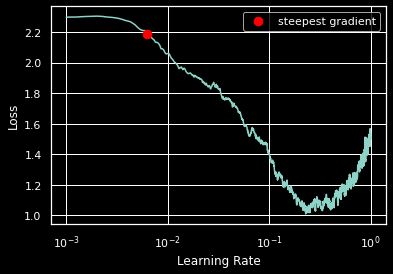

In [8]:
# Find LR
runner.find_lr()

In [9]:
# Training the model
# _ = runner.trainer.train()
runner.train_lr(use_best_lr=True)

[ 2021-04-10 00:28:10,432 -dl_vision - runner.runner ] INFO: Using max_lr: 0.22918384401114206
[ 2021-04-10 00:28:10,436 -dl_vision - runner.runner ] INFO: Using min_lr: 0.007639461467038069
[ 2021-04-10 00:28:10,438 -dl_vision - runner.runner ] INFO: Using initial_lr: 0.011459192200557102
[ 2021-04-10 00:28:10,441 -dl_vision - base.base_trainer ] INFO: Starting the Training.
[ 2021-04-10 00:28:10,442 -dl_vision - base.base_trainer ] INFO: Training the model for 50 epochs.
[ 2021-04-10 00:28:10,444 -dl_vision - base.base_trainer ] INFO: Training Epoch: 0.
[ 2021-04-10 00:28:10,446 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



[ 2021-04-10 00:29:16,889 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 0, Average Loss 1.59522, Accuracy: 42.496%  (0.42496)
[ 2021-04-10 00:29:16,893 -dl_vision - base.base_trainer ] INFO: Test Epoch: 0.
[ 2021-04-10 00:29:19,536 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 0, Average Loss 1.25638, Accuracy: 54.88%  (0.5488)
[ 2021-04-10 00:29:19,538 -dl_vision - base.base_trainer ] INFO: Training Epoch: 1.
[ 2021-04-10 00:29:19,539 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:30:25,107 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 1, Average Loss 1.13639, Accuracy: 59.292%  (0.59292)
[ 2021-04-10 00:30:25,113 -dl_vision - base.base_trainer ] INFO: Test Epoch: 1.
[ 2021-04-10 00:30:27,764 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 1, Average Loss 1.13346, Accuracy: 61.93%  (0.6193)
[ 2021-04-10 00:30:27,766 -dl_vision - base.base_trainer ] INFO: Training Epoch: 2.
[ 2021-04-10 00:30:27,767 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:31:32,951 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 2, Average Loss 0.90095, Accuracy: 68.254%  (0.68254)
[ 2021-04-10 00:31:32,958 -dl_vision - base.base_trainer ] INFO: Test Epoch: 2.
[ 2021-04-10 00:31:35,617 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 2, Average Loss 0.85240, Accuracy: 71.24%  (0.7124)
[ 2021-04-10 00:31:35,619 -dl_vision - base.base_trainer ] INFO: Training Epoch: 3.
[ 2021-04-10 00:31:35,620 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:32:40,680 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 3, Average Loss 0.75499, Accuracy: 73.442%  (0.73442)
[ 2021-04-10 00:32:40,686 -dl_vision - base.base_trainer ] INFO: Test Epoch: 3.
[ 2021-04-10 00:32:43,340 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 3, Average Loss 0.75664, Accuracy: 74.25%  (0.7425)
[ 2021-04-10 00:32:43,342 -dl_vision - base.base_trainer ] INFO: Training Epoch: 4.
[ 2021-04-10 00:32:43,343 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:33:48,688 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 4, Average Loss 0.66782, Accuracy: 76.74%  (0.7674)
[ 2021-04-10 00:33:48,689 -dl_vision - base.base_trainer ] INFO: Test Epoch: 4.
[ 2021-04-10 00:33:51,370 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 4, Average Loss 0.65550, Accuracy: 77.57%  (0.7757)
[ 2021-04-10 00:33:51,371 -dl_vision - base.base_trainer ] INFO: Training Epoch: 5.
[ 2021-04-10 00:33:51,375 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:34:56,692 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 5, Average Loss 0.60379, Accuracy: 79.182%  (0.79182)
[ 2021-04-10 00:34:56,693 -dl_vision - base.base_trainer ] INFO: Test Epoch: 5.
[ 2021-04-10 00:34:59,401 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 5, Average Loss 0.59919, Accuracy: 79.48%  (0.7948)
[ 2021-04-10 00:34:59,403 -dl_vision - base.base_trainer ] INFO: Training Epoch: 6.
[ 2021-04-10 00:34:59,404 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:36:04,694 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 6, Average Loss 0.55137, Accuracy: 80.782%  (0.80782)
[ 2021-04-10 00:36:04,697 -dl_vision - base.base_trainer ] INFO: Test Epoch: 6.
[ 2021-04-10 00:36:07,360 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 6, Average Loss 0.61012, Accuracy: 79.81%  (0.7981)
[ 2021-04-10 00:36:07,362 -dl_vision - base.base_trainer ] INFO: Training Epoch: 7.
[ 2021-04-10 00:36:07,365 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:37:12,850 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 7, Average Loss 0.51715, Accuracy: 81.856%  (0.81856)
[ 2021-04-10 00:37:12,854 -dl_vision - base.base_trainer ] INFO: Test Epoch: 7.
[ 2021-04-10 00:37:15,510 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 7, Average Loss 0.56846, Accuracy: 80.75%  (0.8075)
[ 2021-04-10 00:37:15,511 -dl_vision - base.base_trainer ] INFO: Training Epoch: 8.
[ 2021-04-10 00:37:15,512 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:38:20,769 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 8, Average Loss 0.48208, Accuracy: 83.122%  (0.83122)
[ 2021-04-10 00:38:20,771 -dl_vision - base.base_trainer ] INFO: Test Epoch: 8.
[ 2021-04-10 00:38:23,459 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 8, Average Loss 0.44167, Accuracy: 84.72%  (0.8472)
[ 2021-04-10 00:38:23,461 -dl_vision - base.base_trainer ] INFO: Training Epoch: 9.
[ 2021-04-10 00:38:23,465 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:39:29,072 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 9, Average Loss 0.45249, Accuracy: 84.362%  (0.84362)
[ 2021-04-10 00:39:29,073 -dl_vision - base.base_trainer ] INFO: Test Epoch: 9.
[ 2021-04-10 00:39:31,727 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 9, Average Loss 0.46218, Accuracy: 84.37%  (0.8437)
[ 2021-04-10 00:39:31,729 -dl_vision - base.base_trainer ] INFO: Training Epoch: 10.
[ 2021-04-10 00:39:31,730 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:40:37,251 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 10, Average Loss 0.43016, Accuracy: 84.87%  (0.8487)
[ 2021-04-10 00:40:37,252 -dl_vision - base.base_trainer ] INFO: Test Epoch: 10.
[ 2021-04-10 00:40:39,938 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 10, Average Loss 0.50289, Accuracy: 82.68%  (0.8268)
[ 2021-04-10 00:40:39,940 -dl_vision - base.base_trainer ] INFO: Training Epoch: 11.
[ 2021-04-10 00:40:39,941 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:41:45,451 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 11, Average Loss 0.41234, Accuracy: 85.562%  (0.85562)
[ 2021-04-10 00:41:45,452 -dl_vision - base.base_trainer ] INFO: Test Epoch: 11.
[ 2021-04-10 00:41:48,127 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 11, Average Loss 0.45751, Accuracy: 84.58%  (0.8458)
[ 2021-04-10 00:41:48,129 -dl_vision - base.base_trainer ] INFO: Training Epoch: 12.
[ 2021-04-10 00:41:48,130 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:42:53,431 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 12, Average Loss 0.39498, Accuracy: 86.29%  (0.8629)
[ 2021-04-10 00:42:53,434 -dl_vision - base.base_trainer ] INFO: Test Epoch: 12.
[ 2021-04-10 00:42:56,126 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 12, Average Loss 0.42630, Accuracy: 85.38%  (0.8538)
[ 2021-04-10 00:42:56,128 -dl_vision - base.base_trainer ] INFO: Training Epoch: 13.
[ 2021-04-10 00:42:56,129 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:44:01,489 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 13, Average Loss 0.38036, Accuracy: 86.734%  (0.86734)
[ 2021-04-10 00:44:01,490 -dl_vision - base.base_trainer ] INFO: Test Epoch: 13.
[ 2021-04-10 00:44:04,146 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 13, Average Loss 0.47477, Accuracy: 83.91%  (0.8391)
[ 2021-04-10 00:44:04,147 -dl_vision - base.base_trainer ] INFO: Training Epoch: 14.
[ 2021-04-10 00:44:04,148 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:45:09,389 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 14, Average Loss 0.36786, Accuracy: 87.418%  (0.87418)
[ 2021-04-10 00:45:09,392 -dl_vision - base.base_trainer ] INFO: Test Epoch: 14.
[ 2021-04-10 00:45:12,075 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 14, Average Loss 0.38452, Accuracy: 86.74%  (0.8674)
[ 2021-04-10 00:45:12,077 -dl_vision - base.base_trainer ] INFO: Training Epoch: 15.
[ 2021-04-10 00:45:12,078 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:46:17,172 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 15, Average Loss 0.35184, Accuracy: 87.772%  (0.87772)
[ 2021-04-10 00:46:17,175 -dl_vision - base.base_trainer ] INFO: Test Epoch: 15.
[ 2021-04-10 00:46:19,833 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 15, Average Loss 0.39283, Accuracy: 86.63%  (0.8663)
[ 2021-04-10 00:46:19,834 -dl_vision - base.base_trainer ] INFO: Training Epoch: 16.
[ 2021-04-10 00:46:19,838 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:47:25,083 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 16, Average Loss 0.34764, Accuracy: 87.92%  (0.8792)
[ 2021-04-10 00:47:25,085 -dl_vision - base.base_trainer ] INFO: Test Epoch: 16.
[ 2021-04-10 00:47:27,755 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 16, Average Loss 0.41004, Accuracy: 86.02%  (0.8602)
[ 2021-04-10 00:47:27,756 -dl_vision - base.base_trainer ] INFO: Training Epoch: 17.
[ 2021-04-10 00:47:27,757 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:48:33,244 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 17, Average Loss 0.33871, Accuracy: 88.18%  (0.8818)
[ 2021-04-10 00:48:33,245 -dl_vision - base.base_trainer ] INFO: Test Epoch: 17.
[ 2021-04-10 00:48:36,003 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 17, Average Loss 0.40763, Accuracy: 86.4%  (0.864)
[ 2021-04-10 00:48:36,004 -dl_vision - base.base_trainer ] INFO: Training Epoch: 18.
[ 2021-04-10 00:48:36,012 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.022918384401114204



[ 2021-04-10 00:49:41,328 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 18, Average Loss 0.33717, Accuracy: 88.15%  (0.8815)
[ 2021-04-10 00:49:41,335 -dl_vision - base.base_trainer ] INFO: Test Epoch: 18.
[ 2021-04-10 00:49:44,020 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 18, Average Loss 0.43212, Accuracy: 85.23%  (0.8523)
[ 2021-04-10 00:49:44,021 -dl_vision - base.base_trainer ] INFO: Training Epoch: 19.
[ 2021-04-10 00:49:44,022 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:50:49,284 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 19, Average Loss 0.22286, Accuracy: 92.516%  (0.92516)
[ 2021-04-10 00:50:49,285 -dl_vision - base.base_trainer ] INFO: Test Epoch: 19.
[ 2021-04-10 00:50:51,954 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 19, Average Loss 0.24778, Accuracy: 91.47%  (0.9147)
[ 2021-04-10 00:50:51,956 -dl_vision - base.base_trainer ] INFO: Training Epoch: 20.
[ 2021-04-10 00:50:51,958 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:51:57,050 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 20, Average Loss 0.17637, Accuracy: 94.03%  (0.9403)
[ 2021-04-10 00:51:57,057 -dl_vision - base.base_trainer ] INFO: Test Epoch: 20.
[ 2021-04-10 00:51:59,697 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 20, Average Loss 0.23382, Accuracy: 92.1%  (0.921)
[ 2021-04-10 00:51:59,699 -dl_vision - base.base_trainer ] INFO: Training Epoch: 21.
[ 2021-04-10 00:51:59,704 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:53:04,902 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 21, Average Loss 0.15778, Accuracy: 94.618%  (0.94618)
[ 2021-04-10 00:53:04,908 -dl_vision - base.base_trainer ] INFO: Test Epoch: 21.
[ 2021-04-10 00:53:07,567 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 21, Average Loss 0.23192, Accuracy: 92.36%  (0.9236)
[ 2021-04-10 00:53:07,569 -dl_vision - base.base_trainer ] INFO: Training Epoch: 22.
[ 2021-04-10 00:53:07,570 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:54:12,511 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 22, Average Loss 0.14780, Accuracy: 95.046%  (0.95046)
[ 2021-04-10 00:54:12,516 -dl_vision - base.base_trainer ] INFO: Test Epoch: 22.
[ 2021-04-10 00:54:15,160 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 22, Average Loss 0.23453, Accuracy: 92.51%  (0.9251)
[ 2021-04-10 00:54:15,162 -dl_vision - base.base_trainer ] INFO: Training Epoch: 23.
[ 2021-04-10 00:54:15,166 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:55:20,184 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 23, Average Loss 0.13668, Accuracy: 95.24%  (0.9524)
[ 2021-04-10 00:55:20,188 -dl_vision - base.base_trainer ] INFO: Test Epoch: 23.
[ 2021-04-10 00:55:22,834 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 23, Average Loss 0.22330, Accuracy: 92.71%  (0.9271)
[ 2021-04-10 00:55:22,838 -dl_vision - base.base_trainer ] INFO: Training Epoch: 24.
[ 2021-04-10 00:55:22,840 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:56:27,940 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 24, Average Loss 0.13090, Accuracy: 95.562%  (0.95562)
[ 2021-04-10 00:56:27,943 -dl_vision - base.base_trainer ] INFO: Test Epoch: 24.
[ 2021-04-10 00:56:30,599 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 24, Average Loss 0.23503, Accuracy: 92.31%  (0.9231)
[ 2021-04-10 00:56:30,601 -dl_vision - base.base_trainer ] INFO: Training Epoch: 25.
[ 2021-04-10 00:56:30,605 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:57:36,070 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 25, Average Loss 0.12056, Accuracy: 95.876%  (0.95876)
[ 2021-04-10 00:57:36,071 -dl_vision - base.base_trainer ] INFO: Test Epoch: 25.
[ 2021-04-10 00:57:38,759 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 25, Average Loss 0.22667, Accuracy: 92.32%  (0.9232)
[ 2021-04-10 00:57:38,760 -dl_vision - base.base_trainer ] INFO: Training Epoch: 26.
[ 2021-04-10 00:57:38,762 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:58:44,218 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 26, Average Loss 0.11638, Accuracy: 96.146%  (0.96146)
[ 2021-04-10 00:58:44,220 -dl_vision - base.base_trainer ] INFO: Test Epoch: 26.
[ 2021-04-10 00:58:46,887 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 26, Average Loss 0.22544, Accuracy: 92.58%  (0.9258)
[ 2021-04-10 00:58:46,890 -dl_vision - base.base_trainer ] INFO: Training Epoch: 27.
[ 2021-04-10 00:58:46,891 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.0022918384401114204



[ 2021-04-10 00:59:51,833 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 27, Average Loss 0.10712, Accuracy: 96.428%  (0.96428)
[ 2021-04-10 00:59:51,835 -dl_vision - base.base_trainer ] INFO: Test Epoch: 27.
[ 2021-04-10 00:59:54,544 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 27, Average Loss 0.22348, Accuracy: 92.39%  (0.9239)
[ 2021-04-10 00:59:54,545 -dl_vision - base.base_trainer ] INFO: Training Epoch: 28.
[ 2021-04-10 00:59:54,550 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:00:59,562 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 28, Average Loss 0.09739, Accuracy: 96.814%  (0.96814)
[ 2021-04-10 01:00:59,567 -dl_vision - base.base_trainer ] INFO: Test Epoch: 28.
[ 2021-04-10 01:01:02,241 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 28, Average Loss 0.22191, Accuracy: 92.81%  (0.9281)
[ 2021-04-10 01:01:02,243 -dl_vision - base.base_trainer ] INFO: Training Epoch: 29.
[ 2021-04-10 01:01:02,245 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:02:07,401 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 29, Average Loss 0.09485, Accuracy: 96.838%  (0.96838)
[ 2021-04-10 01:02:07,407 -dl_vision - base.base_trainer ] INFO: Test Epoch: 29.
[ 2021-04-10 01:02:10,075 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 29, Average Loss 0.21601, Accuracy: 92.86%  (0.9286)
[ 2021-04-10 01:02:10,077 -dl_vision - base.base_trainer ] INFO: Training Epoch: 30.
[ 2021-04-10 01:02:10,081 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:03:15,146 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 30, Average Loss 0.09134, Accuracy: 96.964%  (0.96964)
[ 2021-04-10 01:03:15,148 -dl_vision - base.base_trainer ] INFO: Test Epoch: 30.
[ 2021-04-10 01:03:17,792 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 30, Average Loss 0.21642, Accuracy: 92.85%  (0.9285)
[ 2021-04-10 01:03:17,795 -dl_vision - base.base_trainer ] INFO: Training Epoch: 31.
[ 2021-04-10 01:03:17,796 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:04:22,654 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 31, Average Loss 0.08926, Accuracy: 97.094%  (0.97094)
[ 2021-04-10 01:04:22,657 -dl_vision - base.base_trainer ] INFO: Test Epoch: 31.
[ 2021-04-10 01:04:25,352 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 31, Average Loss 0.21685, Accuracy: 93.02%  (0.9302)
[ 2021-04-10 01:04:25,354 -dl_vision - base.base_trainer ] INFO: Training Epoch: 32.
[ 2021-04-10 01:04:25,355 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:05:30,621 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 32, Average Loss 0.09170, Accuracy: 97.004%  (0.97004)
[ 2021-04-10 01:05:30,622 -dl_vision - base.base_trainer ] INFO: Test Epoch: 32.
[ 2021-04-10 01:05:33,294 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 32, Average Loss 0.21406, Accuracy: 92.98%  (0.9298)
[ 2021-04-10 01:05:33,296 -dl_vision - base.base_trainer ] INFO: Training Epoch: 33.
[ 2021-04-10 01:05:33,297 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:06:38,501 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 33, Average Loss 0.08687, Accuracy: 97.158%  (0.97158)
[ 2021-04-10 01:06:38,503 -dl_vision - base.base_trainer ] INFO: Test Epoch: 33.
[ 2021-04-10 01:06:41,190 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 33, Average Loss 0.21529, Accuracy: 92.88%  (0.9288)
[ 2021-04-10 01:06:41,192 -dl_vision - base.base_trainer ] INFO: Training Epoch: 34.
[ 2021-04-10 01:06:41,196 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:07:46,798 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 34, Average Loss 0.08706, Accuracy: 97.144%  (0.97144)
[ 2021-04-10 01:07:46,800 -dl_vision - base.base_trainer ] INFO: Test Epoch: 34.
[ 2021-04-10 01:07:49,486 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 34, Average Loss 0.21972, Accuracy: 93.0%  (0.93)
[ 2021-04-10 01:07:49,487 -dl_vision - base.base_trainer ] INFO: Training Epoch: 35.
[ 2021-04-10 01:07:49,494 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:08:54,768 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 35, Average Loss 0.08580, Accuracy: 97.214%  (0.97214)
[ 2021-04-10 01:08:54,771 -dl_vision - base.base_trainer ] INFO: Test Epoch: 35.
[ 2021-04-10 01:08:57,431 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 35, Average Loss 0.21678, Accuracy: 93.07%  (0.9307)
[ 2021-04-10 01:08:57,432 -dl_vision - base.base_trainer ] INFO: Training Epoch: 36.
[ 2021-04-10 01:08:57,433 -dl_vision - base.base_trainer ] INFO: LR was set to: 0.00022918384401114205



[ 2021-04-10 01:10:02,571 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 36, Average Loss 0.08624, Accuracy: 97.126%  (0.97126)
[ 2021-04-10 01:10:02,573 -dl_vision - base.base_trainer ] INFO: Test Epoch: 36.
[ 2021-04-10 01:10:05,246 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 36, Average Loss 0.21621, Accuracy: 93.03%  (0.9303)
[ 2021-04-10 01:10:05,248 -dl_vision - base.base_trainer ] INFO: Training Epoch: 37.
[ 2021-04-10 01:10:05,253 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-05



[ 2021-04-10 01:11:10,548 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 37, Average Loss 0.08454, Accuracy: 97.18%  (0.9718)
[ 2021-04-10 01:11:10,549 -dl_vision - base.base_trainer ] INFO: Test Epoch: 37.
[ 2021-04-10 01:11:13,227 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 37, Average Loss 0.21429, Accuracy: 93.01%  (0.9301)
[ 2021-04-10 01:11:13,228 -dl_vision - base.base_trainer ] INFO: Training Epoch: 38.
[ 2021-04-10 01:11:13,229 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-05



[ 2021-04-10 01:12:18,483 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 38, Average Loss 0.08259, Accuracy: 97.344%  (0.97344)
[ 2021-04-10 01:12:18,491 -dl_vision - base.base_trainer ] INFO: Test Epoch: 38.
[ 2021-04-10 01:12:21,179 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 38, Average Loss 0.21748, Accuracy: 92.99%  (0.9299)
[ 2021-04-10 01:12:21,181 -dl_vision - base.base_trainer ] INFO: Training Epoch: 39.
[ 2021-04-10 01:12:21,182 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-05



[ 2021-04-10 01:13:26,615 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 39, Average Loss 0.08359, Accuracy: 97.25%  (0.9725)
[ 2021-04-10 01:13:26,617 -dl_vision - base.base_trainer ] INFO: Test Epoch: 39.
[ 2021-04-10 01:13:29,330 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 39, Average Loss 0.21769, Accuracy: 93.03%  (0.9303)
[ 2021-04-10 01:13:29,334 -dl_vision - base.base_trainer ] INFO: Training Epoch: 40.
[ 2021-04-10 01:13:29,339 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-05



[ 2021-04-10 01:14:34,413 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 40, Average Loss 0.08222, Accuracy: 97.334%  (0.97334)
[ 2021-04-10 01:14:34,417 -dl_vision - base.base_trainer ] INFO: Test Epoch: 40.
[ 2021-04-10 01:14:37,104 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 40, Average Loss 0.21546, Accuracy: 93.04%  (0.9304)
[ 2021-04-10 01:14:37,106 -dl_vision - base.base_trainer ] INFO: Training Epoch: 41.
[ 2021-04-10 01:14:37,107 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-05



[ 2021-04-10 01:15:42,432 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 41, Average Loss 0.08165, Accuracy: 97.358%  (0.97358)
[ 2021-04-10 01:15:42,435 -dl_vision - base.base_trainer ] INFO: Test Epoch: 41.
[ 2021-04-10 01:15:45,103 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 41, Average Loss 0.21636, Accuracy: 93.08%  (0.9308)
[ 2021-04-10 01:15:45,105 -dl_vision - base.base_trainer ] INFO: Training Epoch: 42.
[ 2021-04-10 01:15:45,109 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:16:50,491 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 42, Average Loss 0.08461, Accuracy: 97.172%  (0.97172)
[ 2021-04-10 01:16:50,492 -dl_vision - base.base_trainer ] INFO: Test Epoch: 42.
[ 2021-04-10 01:16:53,168 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 42, Average Loss 0.21901, Accuracy: 92.98%  (0.9298)
[ 2021-04-10 01:16:53,169 -dl_vision - base.base_trainer ] INFO: Training Epoch: 43.
[ 2021-04-10 01:16:53,172 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:17:58,384 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 43, Average Loss 0.08165, Accuracy: 97.338%  (0.97338)
[ 2021-04-10 01:17:58,389 -dl_vision - base.base_trainer ] INFO: Test Epoch: 43.
[ 2021-04-10 01:18:01,063 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 43, Average Loss 0.21438, Accuracy: 92.97%  (0.9297)
[ 2021-04-10 01:18:01,065 -dl_vision - base.base_trainer ] INFO: Training Epoch: 44.
[ 2021-04-10 01:18:01,068 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:19:06,315 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 44, Average Loss 0.08152, Accuracy: 97.344%  (0.97344)
[ 2021-04-10 01:19:06,319 -dl_vision - base.base_trainer ] INFO: Test Epoch: 44.
[ 2021-04-10 01:19:08,989 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 44, Average Loss 0.21304, Accuracy: 93.06%  (0.9306)
[ 2021-04-10 01:19:08,991 -dl_vision - base.base_trainer ] INFO: Training Epoch: 45.
[ 2021-04-10 01:19:08,992 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:20:14,069 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 45, Average Loss 0.08256, Accuracy: 97.33%  (0.9733)
[ 2021-04-10 01:20:14,071 -dl_vision - base.base_trainer ] INFO: Test Epoch: 45.
[ 2021-04-10 01:20:16,771 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 45, Average Loss 0.21521, Accuracy: 92.99%  (0.9299)
[ 2021-04-10 01:20:16,774 -dl_vision - base.base_trainer ] INFO: Training Epoch: 46.
[ 2021-04-10 01:20:16,778 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:21:22,018 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 46, Average Loss 0.08122, Accuracy: 97.358%  (0.97358)
[ 2021-04-10 01:21:22,020 -dl_vision - base.base_trainer ] INFO: Test Epoch: 46.
[ 2021-04-10 01:21:24,732 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 46, Average Loss 0.21482, Accuracy: 93.07%  (0.9307)
[ 2021-04-10 01:21:24,733 -dl_vision - base.base_trainer ] INFO: Training Epoch: 47.
[ 2021-04-10 01:21:24,734 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:22:29,964 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 47, Average Loss 0.08317, Accuracy: 97.31%  (0.9731)
[ 2021-04-10 01:22:29,966 -dl_vision - base.base_trainer ] INFO: Test Epoch: 47.
[ 2021-04-10 01:22:32,660 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 47, Average Loss 0.21458, Accuracy: 92.97%  (0.9297)
[ 2021-04-10 01:22:32,663 -dl_vision - base.base_trainer ] INFO: Training Epoch: 48.
[ 2021-04-10 01:22:32,665 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.2918384401114207e-06



[ 2021-04-10 01:23:37,910 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 48, Average Loss 0.08436, Accuracy: 97.158%  (0.97158)
[ 2021-04-10 01:23:37,911 -dl_vision - base.base_trainer ] INFO: Test Epoch: 48.
[ 2021-04-10 01:23:40,607 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 48, Average Loss 0.21801, Accuracy: 92.98%  (0.9298)
[ 2021-04-10 01:23:40,610 -dl_vision - base.base_trainer ] INFO: Training Epoch: 49.
[ 2021-04-10 01:23:40,611 -dl_vision - base.base_trainer ] INFO: LR was set to: 2.291838440111421e-07



[ 2021-04-10 01:24:45,371 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 49, Average Loss 0.08349, Accuracy: 97.288%  (0.97288)
[ 2021-04-10 01:24:45,373 -dl_vision - base.base_trainer ] INFO: Test Epoch: 49.
[ 2021-04-10 01:24:48,051 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 49, Average Loss 0.21379, Accuracy: 93.03%  (0.9303)
[ 2021-04-10 01:24:48,053 -dl_vision - runner.runner ] INFO: Finished.


# Plots

[ 2021-04-10 01:24:48,163 -dl_vision - runner.runner ] INFO: Plotting the Metrics.


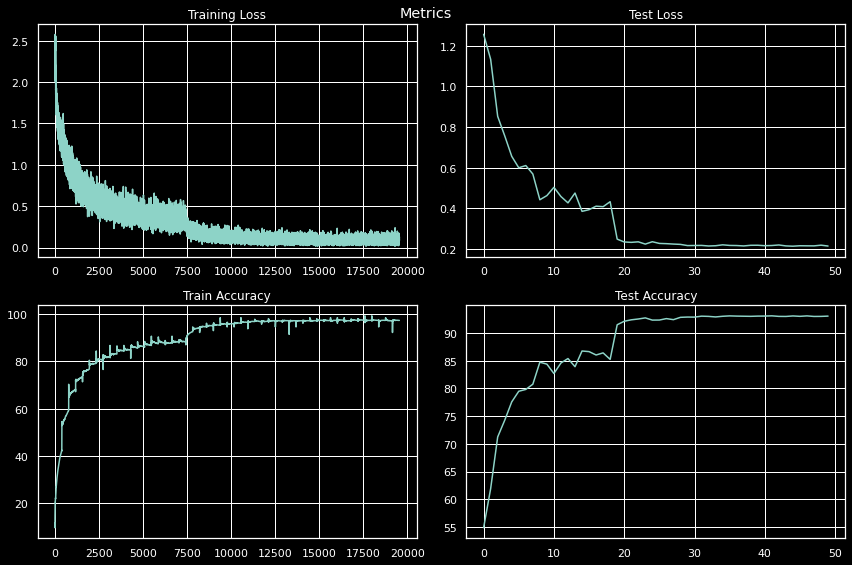

In [10]:
# plot the metrics
plt=runner.plot_metrics()

In [11]:
target_layers = ["layer1", "layer2", "layer3", "layer4"]

[ 2021-04-10 01:24:49,378 -dl_vision - runner.runner ] INFO: Plotting GradCAM.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[ 2021-04-10 01:24:49,755 -dl_vision - runner.runner ] INFO: Plotting for 5 Samples.
[ 2021-04-10 01:24:49,797 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-10 01:24:49,812 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-10 01:24:49,817 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3
[ 2021-04-10 01:24:49,820 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


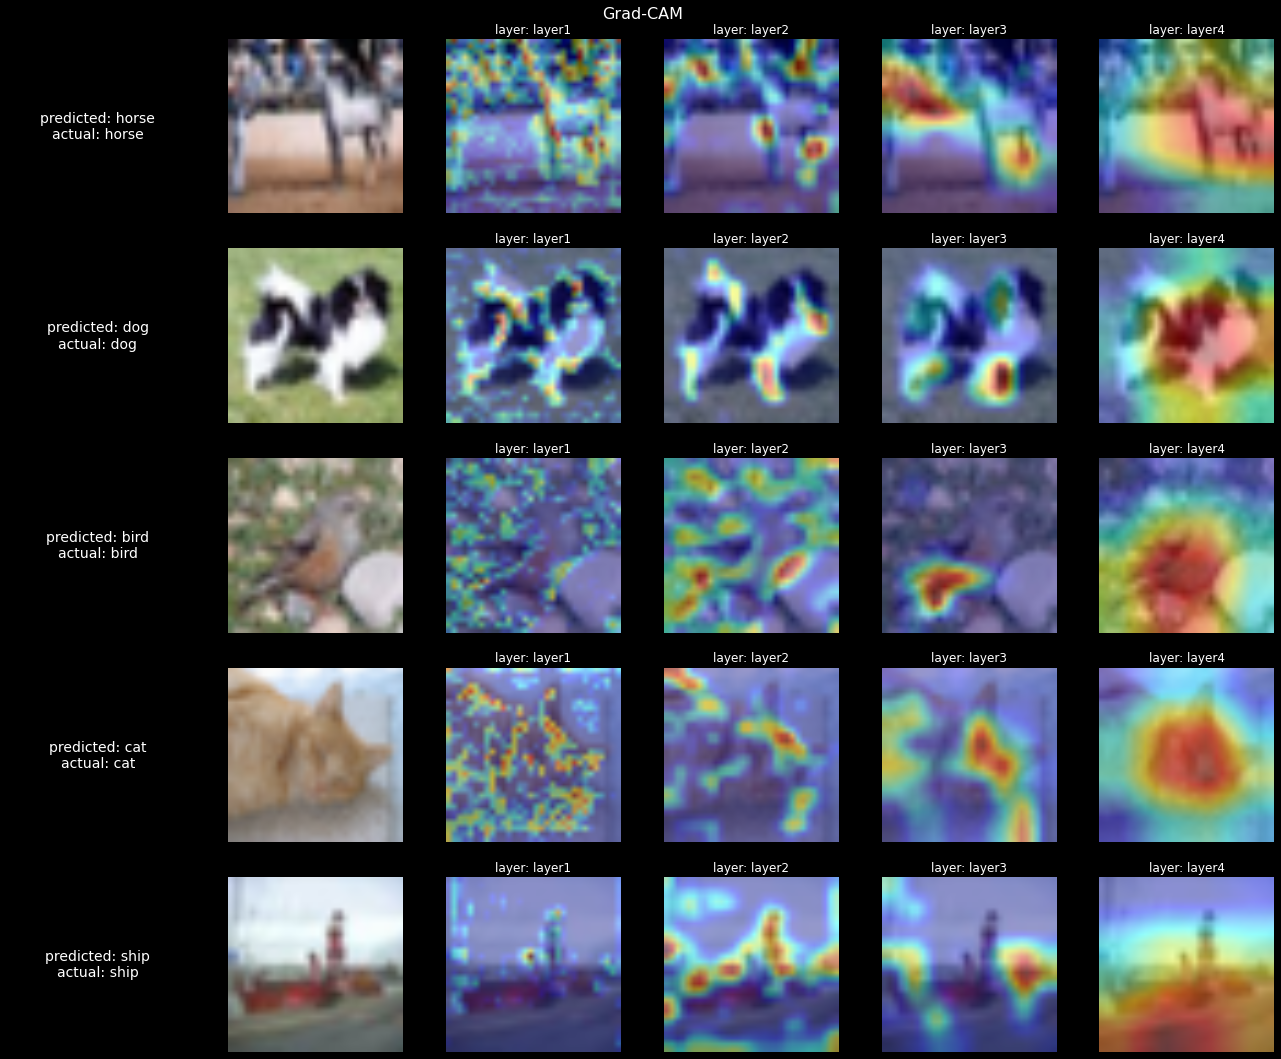

In [12]:
runner.plot_gradcam(target_layers=target_layers)

[ 2021-04-10 01:24:55,029 -dl_vision - runner.runner ] INFO: Model Misclassified Images.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[ 2021-04-10 01:24:57,862 -dl_vision - runner.runner ] INFO: Selecting 25 misclassified Samples.
[ 2021-04-10 01:24:57,879 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer1
[ 2021-04-10 01:24:57,883 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer2
[ 2021-04-10 01:24:57,887 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer3
[ 2021-04-10 01:24:57,891 -dl_vision - utils.grad_cam ] INFO: generating Grad-CAM for layer4


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


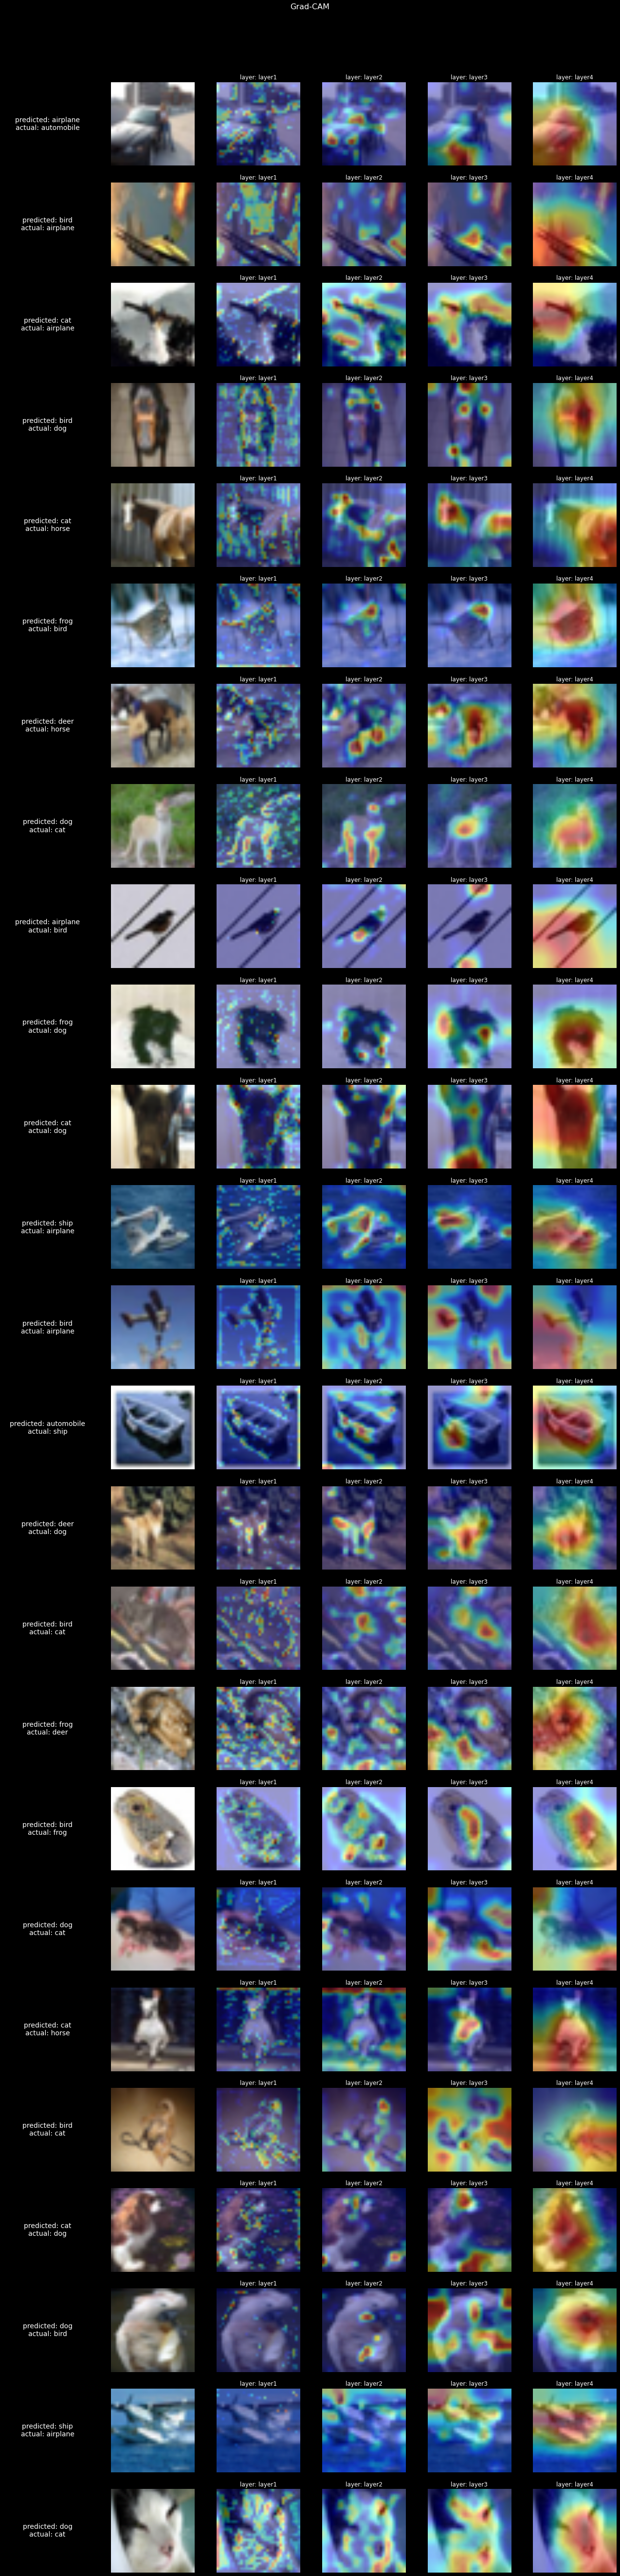

In [13]:
runner.plot_misclassified(target_layers=target_layers)